In [451]:
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter('ignore')

In [452]:
#Read in the csv
lending_data = pd.read_csv("LoanStats_2019Q1.csv")


In [453]:
lending_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000.0,20000.0,20000.0,60 months,17.19%,499.10,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,12000.0,12000.0,12000.0,36 months,16.40%,424.26,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3000.0,3000.0,3000.0,36 months,14.74%,103.62,C,C2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,35000.0,35000.0,35000.0,36 months,15.57%,1223.08,C,C3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,5000.0,5000.0,5000.0,36 months,15.57%,174.73,C,C3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [454]:
lending_df = lending_data[["loan_status","loan_amnt","grade","sub_grade","dti","int_rate","annual_inc","term","delinq_2yrs","revol_bal"]]
status = lending_df.groupby("loan_status").count()
status

,loan_amnt,grade,sub_grade,dti,int_rate,annual_inc,term,delinq_2yrs,revol_bal
loan_status,,,,,,,,,
Charged Off,176,176,176,176,176,176,176,176,176
Current,109176,109176,109176,108936,109176,109176,109176,109176,109176
Fully Paid,4730,4730,4730,4716,4730,4730,4730,4730,4730
In Grace Period,538,538,538,537,538,538,538,538,538
Late (16-30 days),260,260,260,259,260,260,260,260,260
Late (31-120 days),795,795,795,794,795,795,795,795,795


In [ ]:
lending

In [455]:
#Create the upsample and downsample
small_sample = lending_df[(lending_df["loan_status"] == "Charged Off") | (lending_df["loan_status"] == "Late (31-120 days)")]
large_sample = lending_df[(lending_df["loan_status"] == "Fully Paid")]


In [456]:
small_sample = small_sample.dropna()
large_sample = large_sample.dropna()

In [457]:
small_sample.isnull().values.any()
large_sample.isnull().values.sum()

0

In [458]:
n_class0 = len(small_sample)
n_class1 = len(large_sample)

under = large_sample.sample(n_class0)
sample_df = pd.concat([under, small_sample], axis=0)

len(sample_df)


1940

In [459]:
sample_df["loan_category"] = np.where(sample_df["loan_status"] == "Fully Paid", 1, 0)
sample_df.head()

,loan_status,loan_amnt,grade,sub_grade,dti,int_rate,annual_inc,term,delinq_2yrs,revol_bal,loan_category
79830,Fully Paid,20000.0,A,A4,12.50,8.19%,60000.0,36 months,0.0,13413.0,1
38570,Fully Paid,1000.0,D,D4,30.23,25.00%,25920.0,36 months,0.0,6717.0,1
74524,Fully Paid,1500.0,D,D4,22.22,20.89%,68364.0,36 months,0.0,12572.0,1
35594,Fully Paid,4000.0,A,A4,73.60,8.19%,33000.0,36 months,0.0,785.0,1
10518,Fully Paid,4000.0,B,B3,20.26,11.71%,85000.0,36 months,0.0,7530.0,1


In [460]:
# x.strip('NaN') for x in sample_df.loan_status
# x.strip('NaN') for x in sample_df.grade
# x.strip('NaN') for x in sample_df.sub_grade
# x.strip('NaN') for x in sample_df.annual_inc
# x.strip('NaN') for x in sample_df.dti
# x.strip('NaN') for x in sample_df.int_rate
# x.strip('NaN') for x in sample_df.loan_category

# sample_df.grade.str.replace("NaN", "")
# sample_df.sub_grade.str.replace("NaN", "")
# sample_df.addr_state.str.replace("NaN", "")

In [461]:
X = sample_df[["loan_amnt","grade","sub_grade","dti","int_rate","annual_inc","term","delinq_2yrs","revol_bal"]]
y = sample_df["loan_category"].values.reshape(-1,1)
print(X.shape, y.shape)

(1940, 9) (1940, 1)


In [462]:
# np.any(np.isnan(mat))

In [463]:


data_binary_encoded = pd.get_dummies(sample_df, columns=["loan_category"])
data_binary_final = data_binary_encoded.drop(["loan_status","loan_category_0","loan_category_1"], axis=1)
pd.DataFrame(data_binary_final).head()


,loan_amnt,grade,sub_grade,dti,int_rate,annual_inc,term,delinq_2yrs,revol_bal
79830,20000.0,A,A4,12.50,8.19%,60000.0,36 months,0.0,13413.0
38570,1000.0,D,D4,30.23,25.00%,25920.0,36 months,0.0,6717.0
74524,1500.0,D,D4,22.22,20.89%,68364.0,36 months,0.0,12572.0
35594,4000.0,A,A4,73.60,8.19%,33000.0,36 months,0.0,785.0
10518,4000.0,B,B3,20.26,11.71%,85000.0,36 months,0.0,7530.0


# Standard Scaler
Scale the data

In [464]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,loan_amnt,dti,annual_inc,delinq_2yrs,revol_bal,grade_A,grade_B,grade_C,grade_D,grade_E,...,int_rate_28.97%,int_rate_29.00%,int_rate_30.84%,int_rate_6.46%,int_rate_7.02%,int_rate_7.56%,int_rate_8.19%,int_rate_8.81%,term_ 36 months,term_ 60 months
63984,15000.0,2.33,80000.0,0.0,2275.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
98167,5000.0,11.76,40000.0,0.0,4521.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
86199,15000.0,30.14,100000.0,0.0,9632.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2326,4000.0,23.90,35000.0,0.0,6980.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
108733,15000.0,32.94,57500.0,0.0,14601.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [465]:

# from sklearn.preprocessing import StandardScaler
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

In [466]:
y_train_scaled[0:10]

array([[ 1.00620482],
       [ 1.00620482],
       [-0.99383345],
       [ 1.00620482],
       [ 1.00620482],
       [-0.99383345],
       [-0.99383345],
       [-0.99383345],
       [ 1.00620482],
       [ 1.00620482]])

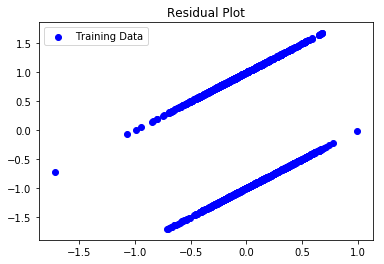

In [467]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), (model.predict(X_train_scaled) - y_train_scaled), c="blue", label="Training Data")
#plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
#plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [468]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
classifier
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6288659793814433
Testing Data Score: 0.5711340206185567


In [481]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")


First 10 Predictions:   [0 1 1 0 0 0 1 1 1 0]
First 10 Actual labels: [[0], [0], [1], [0], [0], [0], [0], [1], [1], [0]]


In [478]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 6.466817709734879e+21, R2: -6.468797819263937e+21


In [479]:
# target = df["Outcome"]
# target_names = ["negative", "positive"]

In [483]:
confusion_matrix(y_test, predictions)

array([[143,  95],
       [113, 134]])

In [477]:
predictions

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,

In [487]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, predictions),
    columns=['Predicted Default', 'Predicted Fully Paid '],
    index=['Actual Default', 'Actual Fully Paid'])

,Predicted Default,Predicted Fully Paid
Actual Default,143,95
Actual Fully Paid,113,134


In [488]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions)

SyntaxError: unexpected EOF while parsing (<ipython-input-488-beedf5e2f405>, line 2)